In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df.iloc[6]['comment_text']

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [ ]:
df[df.columns[2:]].iloc[6]

,6
toxic,1
severe_toxic,1
obscene,1
threat,0
insult,1
identity_hate,0


In [ ]:
# Preprocess
from tensorflow.keras.layers import TextVectorization

In [ ]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [ ]:
X

,comment_text
0,Explanation\nWhy the edits made under my usern...
1,D'aww! He matches this background colour I'm s...
2,"Hey man, I'm really not trying to edit war. It..."
3,"""\nMore\nI can't make any real suggestions on ..."
4,"You, sir, are my hero. Any chance you remember..."
...,...
159566,""":::::And for the second time of asking, when ..."
159567,You should be ashamed of yourself \n\nThat is ...
159568,"Spitzer \n\nUmm, theres no actual article for ..."
159569,And it looks like it was actually you who put ...


In [ ]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
MAX_FEATURES = 200000 # number of words in the vocabalary
vectorizer = TextVectorization(max_tokens = MAX_FEATURES,
                              output_sequence_length = 1800,
                              output_mode = 'int')

In [ ]:
vectorizer.adapt(X.values)

In [ ]:
vectorizer("Hello Guys, Life is GREAT")[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288, 654, 306,   9, 275])>

In [ ]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 np.str_('the'),
 np.str_('to'),
 np.str_('of'),
 np.str_('and'),
 np.str_('a'),
 np.str_('you'),
 np.str_('i'),
 np.str_('is'),
 np.str_('that'),
 np.str_('in'),
 np.str_('it'),
 np.str_('for'),
 np.str_('this'),
 np.str_('not'),
 np.str_('on'),
 np.str_('be'),
 np.str_('as'),
 np.str_('have'),
 np.str_('are'),
 np.str_('your'),
 np.str_('with'),
 np.str_('if'),
 np.str_('article'),
 np.str_('was'),
 np.str_('or'),
 np.str_('but'),
 np.str_('page'),
 np.str_('my'),
 np.str_('an'),
 np.str_('from'),
 np.str_('by'),
 np.str_('do'),
 np.str_('at'),
 np.str_('about'),
 np.str_('me'),
 np.str_('so'),
 np.str_('wikipedia'),
 np.str_('can'),
 np.str_('what'),
 np.str_('there'),
 np.str_('all'),
 np.str_('has'),
 np.str_('will'),
 np.str_('talk'),
 np.str_('please'),
 np.str_('would'),
 np.str_('its'),
 np.str_('no'),
 np.str_('one'),
 np.str_('just'),
 np.str_('like'),
 np.str_('they'),
 np.str_('he'),
 np.str_('dont'),
 np.str_('which'),
 np.str_('any'),
 np.str_('been'),
 np

In [ ]:
vectorized_text = vectorizer(X.values)

In [ ]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [ ]:
# Data Pipeline
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(1600000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [ ]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [ ]:
train = dataset.take(int(len(dataset)*.7)) # 70% of data for training
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2)) # skip 70% of data and take next 20% for validation
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1)) # skip 90% of data and take next 10% for validation

In [ ]:
train_generator = train.as_numpy_iterator()

In [ ]:
train_generator.next()

(array([[5843,  165,  798, ...,    0,    0,    0],
        [ 533,  534,   98, ...,    0,    0,    0],
        [  53,   19,    6, ...,    0,    0,    0],
        ...,
        [  86,  844,   46, ...,    0,    0,    0],
        [1778,  540,    2, ...,    0,    0,    0],
        [  35,    2, 1015, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [ ]:
# Creating the  sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(MAX_FEATURES+1, 32))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpoint_callback = ModelCheckpoint(
    "model_checkpoint_epoch_{epoch:02d}.h5",
    save_weights_only=False,
    save_best_only=False,
    verbose=1
)

In [ ]:
history = model.fit(train, epochs=5, validation_data=val, callbacks=[checkpoint_callback])

Epoch 1/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9620 - loss: 0.0824
Epoch 1: saving model to model_checkpoint_epoch_01.h5


6981/6981 ━━━━━━━━━━━━━━━━━━━━ 692s 99ms/step - accuracy: 0.9620 - loss: 0.0824 - val_accuracy: 0.9944 - val_loss: 0.0495
Epoch 2/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9934 - loss: 0.0467
Epoch 2: saving model to model_checkpoint_epoch_02.h5


6981/6981 ━━━━━━━━━━━━━━━━━━━━ 676s 97ms/step - accuracy: 0.9934 - loss: 0.0467 - val_accuracy: 0.9947 - val_loss: 0.0407
Epoch 3/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9936 - loss: 0.0409
Epoch 3: saving model to model_checkpoint_epoch_03.h5


6981/6981 ━━━━━━━━━━━━━━━━━━━━ 677s 97ms/step - accuracy: 0.9936 - loss: 0.0409 - val_accuracy: 0.9940 - val_loss: 0.0370
Epoch 4/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9942 - loss: 0.0370
Epoch 4: saving model to model_checkpoint_epoch_04.h5


6981/6981 ━━━━━━━━━━━━━━━━━━━━ 675s 97ms/step - accuracy: 0.9942 - loss: 0.0370 - val_accuracy: 0.9943 - val_loss: 0.0315
Epoch 5/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9922 - loss: 0.0325
Epoch 5: saving model to model_checkpoint_epoch_05.h5


6981/6981 ━━━━━━━━━━━━━━━━━━━━ 673s 96ms/step - accuracy: 0.9922 - loss: 0.0325 - val_accuracy: 0.9939 - val_loss: 0.0284


In [ ]:
history.history

{'accuracy': [0.9858813285827637,
  0.9934196472167969,
  0.993079423904419,
  0.9936792850494385,
  0.99287348985672],
 'loss': [0.06210092082619667,
  0.046601373702287674,
  0.041212692856788635,
  0.03730282932519913,
  0.03276880830526352],
 'val_accuracy': [0.9943580627441406,
  0.9946715235710144,
  0.9939819574356079,
  0.9943267107009888,
  0.9939192533493042],
 'val_loss': [0.04946451261639595,
  0.04069359600543976,
  0.03696407005190849,
  0.03152253106236458,
  0.028369653970003128]}

<Figure size 800x500 with 0 Axes>

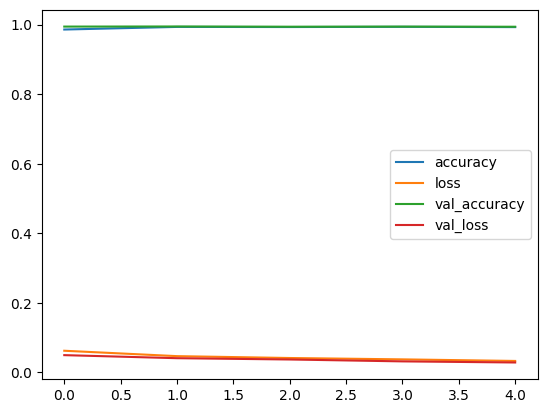

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [ ]:
# Predictions
input_text = vectorizer("You freaking suck! I am going to kill you.")

In [ ]:
model.predict(np.expand_dims(input_text,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


array([[0.99800044, 0.3495836 , 0.93897647, 0.1113092 , 0.9253374 ,
        0.52697736]], dtype=float32)

In [ ]:
batch_X, batch_y = test.as_numpy_iterator()

ValueError: too many values to unpack (expected 2)

In [ ]:
(model.predict(batch_X) > 0.5).astype(int)

NameError: name 'batch_X' is not defined

In [ ]:
# Model Evaluation
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.8708268404006958, Recall: 0.814414918422699, Accuracy: 0.48345035314559937


In [ ]:
#  Test and Gradio
!pip install gradio jinja2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import numpy as np
import gradio as gr

In [ ]:
# loading the model
model = tf.keras.models.load_model('/content/model_checkpoint_epoch_05.h5')

In [ ]:
input_str = vectorizer("hey! I freaken hate you! I am coming for and I am going to kill you")

In [ ]:
res = model.predict(np.expand_dims(input_str,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


In [ ]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
res

array([[0.8960241 , 0.00546652, 0.15620948, 0.01689314, 0.5637048 ,
        0.07727302]], dtype=float32)

In [ ]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)

    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx] > 0.5)
    return text

In [ ]:
interface = gr.Interface(
    fn=score_comment,
    inputs=gr.Textbox(lines=2, placeholder="Comment to score"),
    outputs=gr.Text()
)

In [ ]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3f72da9916a0792600.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
